# Data Import and EDA

In [1]:
import scorecardpy as sc
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import itertools
from warnings import filterwarnings
filterwarnings('ignore')
import time

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,scale
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn import neighbors
from sklearn.svm import SVR
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_recall_curve,f1_score,auc
from sklearn import metrics

In [3]:
df = pd.read_excel("default_data.xls")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


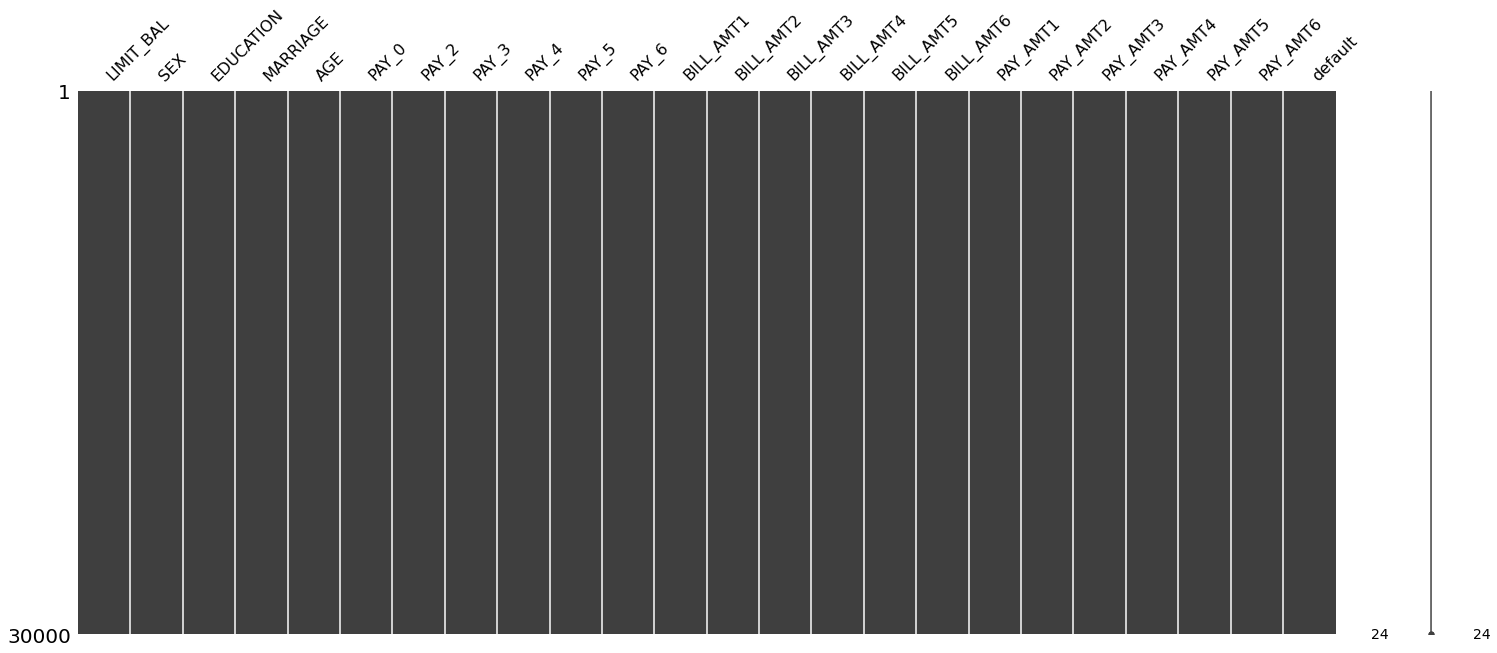

In [322]:
#Data have missing value?
msno.matrix(df);
#amelia in R

We don't have any missing values in the data. If we had, we could use these methods:
1. Drop all cases with missing values
2. Replace missing values with medians
3. "multiple imputation"
4. Bayesian imputation

In [323]:
#Unique values by columns
df.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

All variables are integer so there is no need to transformation

#### Correlation Matrix

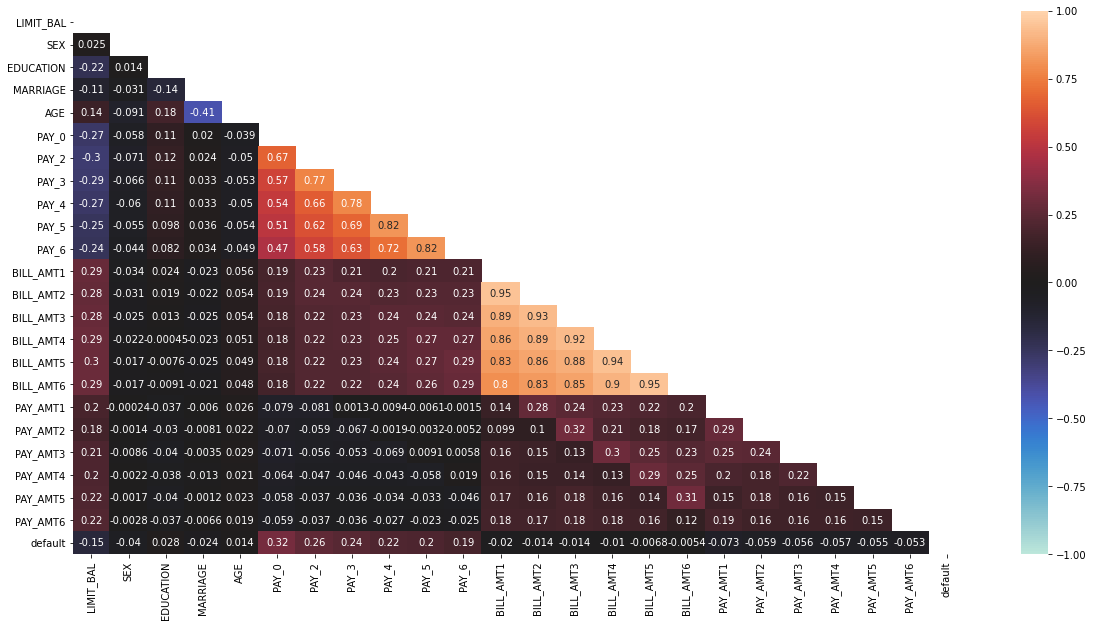

In [324]:
plt.figure(figsize=(20,10))
matrix = np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(), annot=True, mask=matrix,vmin=-1, vmax=1, center= 0);

#### Histograms

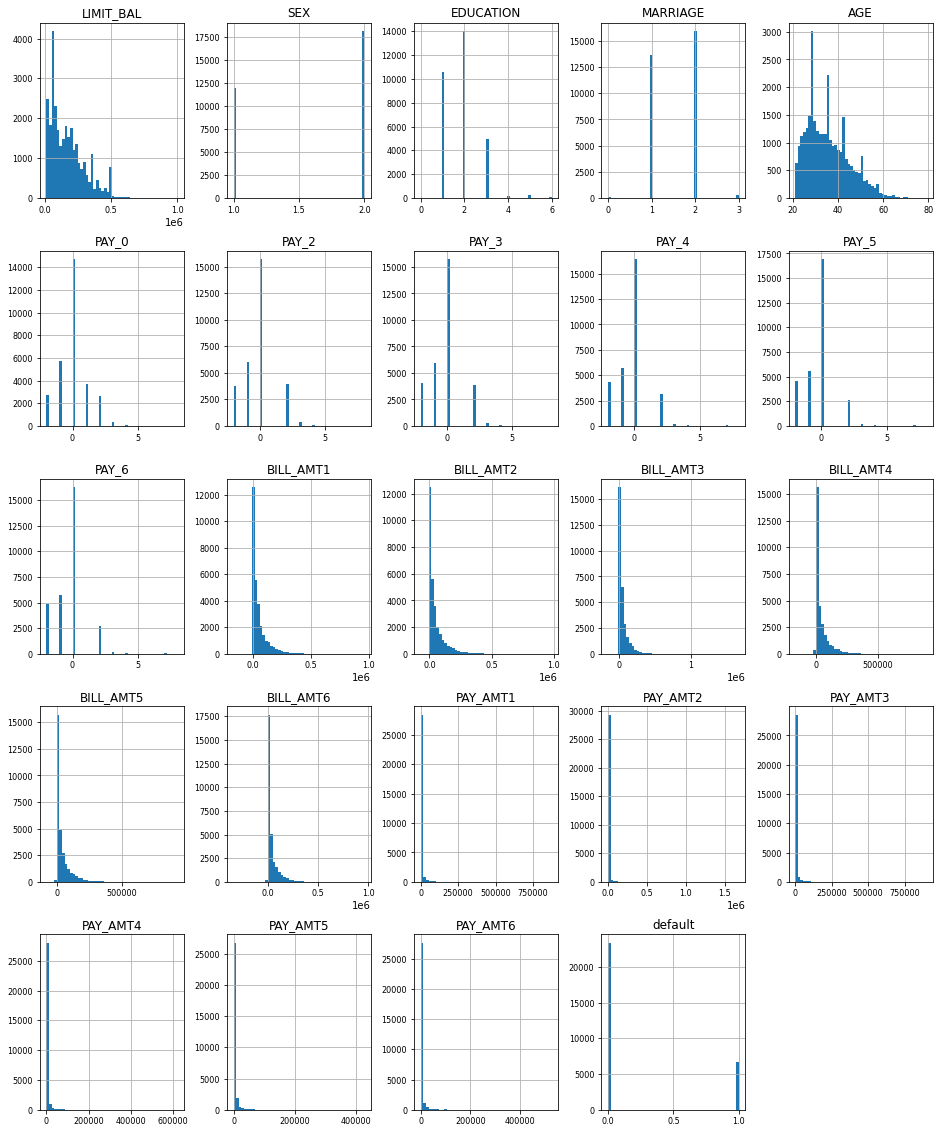

In [325]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

# Feature Engineering

In [4]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
df_engineering=df.copy()

In [6]:
import scorecard_functions as sf
df_engineering=sf.feature_engineering(df)

In [7]:
df_engineering

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_BAL_PAY_AMT_1,LIMIT_BAL_PAY_AMT_2,LIMIT_BAL_PAY_AMT_3,LIMIT_BAL_PAY_AMT_4,LIMIT_BAL_PAY_AMT_5,LIMIT_BAL_PAY_AMT_6,LIMIT_BAL_BILL_AMT_1,LIMIT_BAL_BILL_AMT_2,LIMIT_BAL_BILL_AMT_3,LIMIT_BAL_BILL_AMT_4,LIMIT_BAL_BILL_AMT_5,LIMIT_BAL_BILL_AMT_6,LIMIT_BAL_PAY_AMT_TOT,LIMIT_BAL_BILL_AMT_TOT,PAY_SUM20,PAY_SUM21,PAY_SUM22,PAY_SUM23,PAY_SUM24,PAY_SUM25,PAY_SUM26,PAY_SUM27,PAY_SUM28,PAY_SUM29,PAY_SUM210,PAY_SUM211,PAY_SUM212,PAY_SUM213,PAY_SUM214,PAY_SUM30,PAY_SUM31,PAY_SUM32,PAY_SUM33,PAY_SUM34,PAY_SUM35,PAY_SUM36,PAY_SUM37,PAY_SUM38,PAY_SUM39,PAY_SUM310,PAY_SUM311,PAY_SUM312,PAY_SUM313,PAY_SUM314,PAY_SUM315,PAY_SUM316,PAY_SUM317,PAY_SUM318,PAY_SUM319,PAY_SUM40,PAY_SUM41,PAY_SUM42,PAY_SUM43,PAY_SUM44,PAY_SUM45,PAY_SUM46,PAY_SUM47,PAY_SUM48,PAY_SUM49,PAY_SUM410,PAY_SUM411,PAY_SUM412,PAY_SUM413,PAY_SUM414,PAY_SUM50,PAY_SUM51,PAY_SUM52,PAY_SUM53,PAY_SUM54,PAY_SUM55,PAY_SUM60,SEX_EDUCATION,SEX_MARRIAGE,EDUCATION_MARRIAGE,SEX_EDUCATION_MARRIAGE,BILL_MINUS_PAY_1,BILL_MINUS_PAY_2,BILL_MINUS_PAY_3,BILL_MINUS_PAY_4,BILL_MINUS_PAY_5,BILL_MINUS_PAY_6
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.000000,0.034450,0.000000,0.000000,0.000000,0.000000,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.034450,0.385200,4,1,1,0,0,1,1,0,0,-2,-3,-3,-3,-3,-4,3,3,2,2,0,-1,-1,-1,-1,-2,0,-1,-1,-1,-1,-2,-4,-4,-5,-5,2,1,1,1,1,0,-2,-2,-3,-3,-2,-2,-3,-3,-6,0,0,-1,-1,-4,-4,-2,9,5,7,29,3913,2413,689,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.000000,0.008333,0.008333,0.008333,0.000000,0.016667,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.041667,0.142308,1,-1,-1,-1,1,2,2,2,4,0,0,2,0,2,2,1,1,1,3,-1,-1,1,-1,1,1,2,2,4,2,4,4,0,2,2,2,1,1,3,1,3,3,-1,1,1,1,2,4,4,4,2,1,3,3,3,1,4,3,9,6,8,30,2682,725,1682,2272,3455,1261
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.016867,0.016667,0.011111,0.011111,0.011111,0.055556,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.122422,1.129478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,6,8,30,27721,12527,12559,13331,13948,10549
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.040000,0.040380,0.024000,0.022000,0.021380,0.020000,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.167760,4.626680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,5,7,29,44990,46214,48091,27214,27890,28547
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.040000,0.733620,0.200000,0.180000,0.013780,0.013580,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,1.180980,2.186780,-1,-2,-1,-1,-1,-1,0,0,0,-1,-1,-1,0,0,0,-2,-1,-1,-1,-2,-2,-2,-1,-1,-1,-1,-1,-1,0,0,0,-1,-1,-1,0,-2,-2,-2,-1,-1,-1,-2,-2,-2,-1,-1,-1,-1,0,-1,-2,-2,-2,-1,-2,-1,-2,2,1,7,7,6617,-31011,25835,11940,18457,18452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0.038636,0.090909,0.022741,0.013850,0.022727,0.004545,0.858855,0.876432,0.947114,0.400018,0.141986,0.072636,0.193409,3.297041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,11,11,180448,172815,203362,84957,26237,14980
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,

In [8]:
df_engineering=sf.outlier_limit_bal(df_engineering)

In [10]:
df_engineering.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,LIMIT_BAL_PAY_AMT_1,LIMIT_BAL_PAY_AMT_2,LIMIT_BAL_PAY_AMT_3,LIMIT_BAL_PAY_AMT_4,LIMIT_BAL_PAY_AMT_5,LIMIT_BAL_PAY_AMT_6,LIMIT_BAL_BILL_AMT_1,LIMIT_BAL_BILL_AMT_2,LIMIT_BAL_BILL_AMT_3,LIMIT_BAL_BILL_AMT_4,LIMIT_BAL_BILL_AMT_5,LIMIT_BAL_BILL_AMT_6,LIMIT_BAL_PAY_AMT_TOT,LIMIT_BAL_BILL_AMT_TOT,PAY_SUM20,PAY_SUM21,PAY_SUM22,PAY_SUM23,PAY_SUM24,PAY_SUM25,PAY_SUM26,PAY_SUM27,PAY_SUM28,PAY_SUM29,PAY_SUM210,PAY_SUM211,PAY_SUM212,PAY_SUM213,PAY_SUM214,PAY_SUM30,PAY_SUM31,PAY_SUM32,PAY_SUM33,PAY_SUM34,PAY_SUM35,PAY_SUM36,PAY_SUM37,PAY_SUM38,PAY_SUM39,PAY_SUM310,PAY_SUM311,PAY_SUM312,PAY_SUM313,PAY_SUM314,PAY_SUM315,PAY_SUM316,PAY_SUM317,PAY_SUM318,PAY_SUM319,PAY_SUM40,PAY_SUM41,PAY_SUM42,PAY_SUM43,PAY_SUM44,PAY_SUM45,PAY_SUM46,PAY_SUM47,PAY_SUM48,PAY_SUM49,PAY_SUM410,PAY_SUM411,PAY_SUM412,PAY_SUM413,PAY_SUM414,PAY_SUM50,PAY_SUM51,PAY_SUM52,PAY_SUM53,PAY_SUM54,PAY_SUM55,PAY_SUM60,SEX_EDUCATION,SEX_MARRIAGE,EDUCATION_MARRIAGE,SEX_EDUCATION_MARRIAGE,BILL_MINUS_PAY_1,BILL_MINUS_PAY_2,BILL_MINUS_PAY_3,BILL_MINUS_PAY_4,BILL_MINUS_PAY_5,BILL_MINUS_PAY_6
count,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,2.983300e+04,29833.000000,29833.000000,29833.000000,29833.000000,2.983300e+04,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.00000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,29833.000000,2.983300e+04,2.983300e+04,29833.000000,29833.000000,29833.000000
mean,164963.284953,35.463983,-0.015017,-0.132236,-0.164717,-0.219254,-0.265109,-0.289914,50508.406194,48506.390574,4.635269e+04,42631.006805,39715.641806,38279.789696,5605.118996,5.862359e+03,5113.647035,4756.921664,4690.585694,5121.518620,0.221801,0.045191,0.044637,0.038279,0.035650,0.034496,0.035435,0.424505,0.411874,0.392867,0.360083,0.333633,0.319054,0.233687,2.242016,-0.147253,-0.179734,-0.234271,-0.280126,-0.304931,-0.296953,-0.351490,-0.397345,-0.422150,-0.383971,-0.429826,-0.454631,-0.484363,-0.509168,-0.555023,-0.311970,-0.366507,-0.412362,-0.437167,-0.398988,-0.444843,-0.469648,-0.499380,-0.524185,-0.570040,-0.516207,-0.562062,-0.586867,-0.616599,-0.641404,-0.687259,-0.649080,-0.673885,-0.71974,-0.774277,-0.531224,-0.577079,-0.601884,-0.631616,-0.656421,-0.702276,-0.664097,-0.688902,-0.734757,-0.789294,-0.781316,-0.806121,-0.851976,-0.906513,-0.938994,-0.796333,-0.821138,-0.866993,-0.921530,-0.954011,-1.071230,-1.086247,6.082627,3.968223,6.942513,20.231153,44903.287199,4.264403e+04,4.123904e+04,37874.085141,35025.056112,33158.271076
std,125529.099652,9.218344,1.124272,1.198032,1.197798,1.170399,1.134290,1.150885,71650.808789,69268.437060,6.754994e+04,62444.527519,58902.828515,57803.698109,16382.410837,2.292933e+04,16388.582348,15258.488005,14680.485954,17405.221856,0.415465,0.100420,0.126701,0.093556,0.097977,0.088122,0.096308,0.411776,0.404861,0.396767,0.368945,0.350769,0.345622,0.315926,2.112649,2.123311,2.05

# Modelling Steps

In [13]:
#from supervised.automl import AutoML
#automl = AutoML(eval_metric="auc")
#automl.fit(X_train, pd.Series(y_train))

In [11]:
df_bin=df_engineering.copy()

In [14]:
from optbinning import BinningProcess, Scorecard
from optbinning.scorecard import ScorecardMonitoring,plot_ks,plot_auc_roc

In [17]:
X = df_bin.loc[:,df_bin.columns != 'default']
variable_names=X.columns.tolist()
y=df_bin.default.tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
binning_process = BinningProcess(variable_names)
estimator = LogisticRegression()
scorecard = Scorecard(binning_process=binning_process, estimator=estimator,scaling_method="min_max",scaling_method_params={"min": 0, "max": 1000},
                      reverse_scorecard=False,verbose=True).fit(X_train, y_train)

2021-10-01 23:41:54,317 | INFO : Scorecard building process started.
2021-10-01 23:41:54,317 | INFO : Options: check parameters.
2021-10-01 23:41:54,325 | INFO : Dataset: binary target.
2021-10-01 23:41:54,325 | INFO : Binning process started.
2021-10-01 23:42:15,144 | INFO : Binning process terminated. Time: 20.8173s
2021-10-01 23:42:15,153 | INFO : Fitting estimator.
2021-10-01 23:42:15,859 | INFO : Fitting terminated. Time 0.7132s
2021-10-01 23:42:15,868 | INFO : Scorecard table building started.
2021-10-01 23:42:16,843 | INFO : Scorecard table terminated. Time: 0.9765s
2021-10-01 23:42:16,843 | INFO : Scorecard building process terminated. Time: 22.5263s


In [18]:
scorecard_table=scorecard.table(style="detailed")
scorecard_table
#scorecard_table.loc[scorecard_table.Variable=='PAY_0']

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,LIMIT_BAL,0,"(-inf, 25000.00)",1856,0.082953,1186,670,0.360991,-0.684287,0.045787,0.005614,-0.155646,1.875264
1,LIMIT_BAL,1,"[25000.00, 45000.00)",1383,0.061813,890,493,0.356471,-0.664638,0.032063,0.003936,-0.155646,1.967769
2,LIMIT_BAL,2,"[45000.00, 75000.00)",3691,0.164968,2701,990,0.268220,-0.251678,0.011173,0.001393,-0.155646,3.911983
3,LIMIT_BAL,3,"[75000.00, 125000.00)",3410,0.152409,2568,842,0.246921,-0.140248,0.003114,0.000389,-0.155646,4.436597
4,LIMIT_BAL,4,"[125000.00, 145000.00)",1131,0.050550,875,256,0.226348,-0.026304,0.000035,0.000004,-0.155646,4.973043
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,BILL_MINUS_PAY_6,5,"[22144.50, 49316.00)",3834,0.171360,2875,959,0.250130,-0.157434,0.004432,0.000553,0.117198,5.654992
6,BILL_MINUS_PAY_6,6,"[49316.00, 101094.50)",2735,0.122240,2150,585,0.213894,0.046261,0.000258,0.000032,0.117198,4.932889
7,BILL_MINUS_PAY_6,7,"[101094.50, inf)",2383,0.106508,1890,493,0.206882,0.088472,0.000813,0.000102,0.117198,4.783247
8,BILL_MINUS_PAY_6,8,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.117198,5.096884


In [ ]:
score_train = pd.DataFrame(scorecard.score(X_train),columns=['score'])
y_pred_train = pd.DataFrame(scorecard.predict(X_train),columns=['y_pred'])

In [198]:
accuracy_score(pd.Series(y_test),scorecard.predict(X_test))

0.8208875184341065

In [199]:
accuracy_score(pd.Series(y_train),y_pred_train)

0.8213551443639939

In [235]:
pd.concat([score,y_pred],axis=1).sort_values('score')

,score,y_pred
17667,394.433134,1
15218,405.736720,1
19275,406.166185,1
17602,406.679274,1
20600,406.836824,1
...,...,...
11843,594.423242,0
20157,594.853791,0
981,594.944136,0
10620,596.535337,0


In [236]:
scorecard_monitoring=ScorecardMonitoring(scorecard=scorecard).fit(X_test,pd.Series(y_test),X_train,pd.Series(y_train))

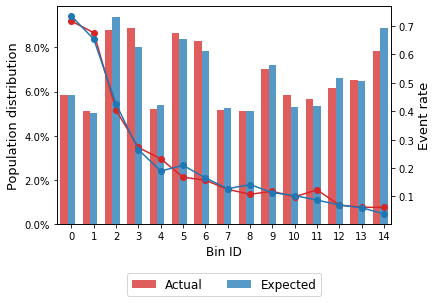

In [250]:
scorecard_monitoring.psi_plot()

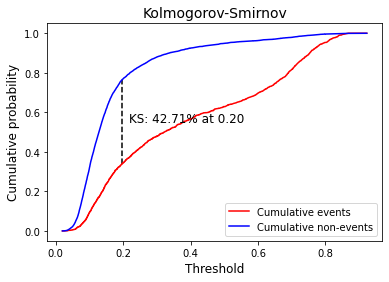

In [246]:
plot_ks(y=pd.Series(y_test),y_pred=scorecard.predict_proba(X_test)[:, 1])

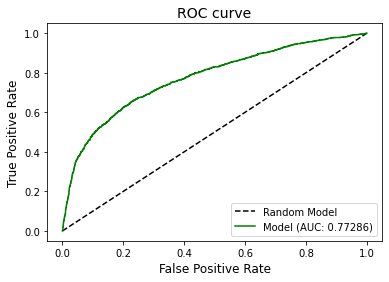

In [247]:
plot_auc_roc(y=pd.Series(y_test),y_pred=scorecard.predict_proba(X_test)[:, 1])


In [29]:
X = df_bin.loc[:,df_bin.columns != 'default']
variable_names=X.columns.tolist()
y=df_bin.default.tolist()
binning_rules = BinningProcess(variable_names).fit(X,y)
X=binning_rules.transform(X)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y, test_size=0.25,random_state=42)

In [182]:
#df_to_excel=pd.concat([train_to_excel,test_to_excel],axis=0)
#df_to_excel.to_excel("df_engineering.xlsx")

In [183]:
#woe_to_excel=pd.concat([train_woe_to_excel,test_woe_to_excel],axis=0)
#woe_to_excel.to_excel("df_woe.xlsx")

In [184]:
#names_for_iv=list(iv_values.loc[(iv_values.info_value>0.1) & (iv_values.info_value< 0.5)].variable)
#names_for_iv=list(iv_values.loc[(iv_values.info_value>0.1) & (iv_values.info_value<0.9) ].variable)
#IV elimination step
#df_bin=pd.concat([df_bin[names_for_iv],df_bin['default']],axis=1)

### Logistic Regression Results

In [278]:
#lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1).fit(X_train_bin, y_train_bin)
lr = LogisticRegression().fit(X_train_bin, y_train_bin)

In [279]:
#create a variable with all zeros
all_zero_ytest = pd.DataFrame(0, index=range(len(y_test_bin)), columns=range(1))

In [280]:
predicted_test=pd.Series(lr.predict(X_test_bin),name="predicted_test").reset_index(drop=True)
predicted_train=pd.Series(lr.predict(X_train_bin),name="predicted_train").reset_index(drop=True)
y_prob = pd.Series(lr.predict_proba(X_test_bin)[:, 1],name="predicted_prob").reset_index(drop=True)
y_prob_train = pd.Series(lr.predict_proba(X_train_bin)[:, 1],name="predicted_prob").reset_index(drop=True)
auc_test = roc_auc_score(y_test_bin, y_prob)
auc_train = roc_auc_score(y_train_bin, y_prob_train)
print("Train Data Accuracy is: ",accuracy_score(y_train_bin, predicted_train))
print("Test Data Accuracy is: ",accuracy_score(y_test_bin, predicted_test))
print("Test Data All Zero (Base) Accuracy is: ",accuracy_score(y_test_bin, all_zero_ytest))
print("Train AUC: ",auc_train)
print("Test AUC: ",auc_test)

Train Data Accuracy is:  0.8219361759184768
Test Data Accuracy is:  0.8227644456361443
Test Data All Zero (Base) Accuracy is:  0.7781203914733879
Train AUC:  0.7837968688381342
Test AUC:  0.7755596723584735


In [281]:
te = {'predicted_probs_test': lr.predict_proba(X_test_bin)[:,1], 'actual_test': y_test_bin,'predicted_test': lr.predict(X_test_bin)}
test_results= pd.DataFrame(data=te).sort_values("predicted_probs_test",ascending=True)
tr = {'predicted_probs_train': lr.predict_proba(X_train_bin)[:,1], 'actual_train': y_train_bin,'predicted_train': lr.predict(X_train_bin)}
train_results= pd.DataFrame(data=tr).sort_values("predicted_probs_train",ascending=True)
train_breaks_adj = {'predicted_probs_train': [0.03,0.05,0.08,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
train_bins_prob = sc.woebin(train_results, y="actual_train",breaks_list=train_breaks_adj)
test_breaks_adj = {'predicted_probs_test': [0.1,0.2,0.3,0.4,0.5,0.6,0.7]}
test_bins_prob = sc.woebin(test_results, y="actual_test",breaks_list=test_breaks_adj)
ms_train=pd.DataFrame(train_bins_prob['predicted_probs_train']).drop(['breaks','is_special_values'],axis=1)
ms_test=pd.DataFrame(test_bins_prob['predicted_probs_test']).drop(['breaks','is_special_values'],axis=1)
ms_train["good_dist"],ms_train["bad_dist"]=ms_train.good/ms_train.good.sum(),ms_train.bad/ms_train.bad.sum()
ms_test["good_dist"],ms_test["bad_dist"]=ms_test.good/ms_test.good.sum(),ms_test.bad/ms_test.bad.sum()
ms_train["cum_good_dist"],ms_train["cum_bad_dist"]=np.cumsum(ms_train.good_dist),np.cumsum(ms_train.bad_dist)
ms_test["cum_good_dist"],ms_test["cum_bad_dist"]=np.cumsum(ms_test.good_dist),np.cumsum(ms_test.bad_dist)
ms_train["KS"],ms_test["KS"]=round((ms_train["cum_good_dist"]-ms_train["cum_bad_dist"]),4),round((ms_test["cum_good_dist"]-ms_test["cum_bad_dist"]),4)
print("KS Train:",max(ms_train["KS"]))
print("KS Test:",max(ms_test["KS"]))

[INFO] creating woe binning ...
[INFO] creating woe binning ...
KS Train: 0.4217
KS Test: 0.4269


#### All Data Results

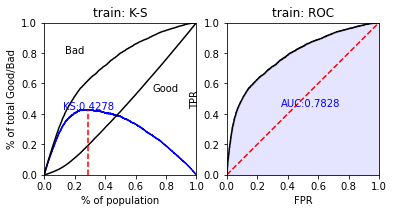

{'KS': 0.4278, 'AUC': 0.7828, 'Gini': 0.5656, 'pic': <Figure size 432x288 with 2 Axes>}


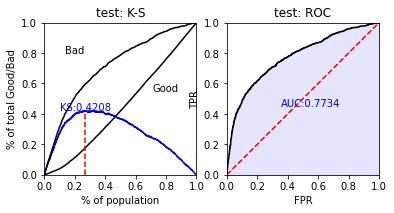

{'KS': 0.4208, 'AUC': 0.7734, 'Gini': 0.5468, 'pic': <Figure size 432x288 with 2 Axes>}


In [506]:
# predicted proability
train_pred = lr.predict_proba(X_train_bin)[:,1]
test_pred = lr.predict_proba(X_test_bin)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_bin, train_pred, title = "train")
print(train_perf)
test_perf = sc.perf_eva(y_test_bin, test_pred, title = "test")
print(test_perf)

#### Results for probality < 0.3

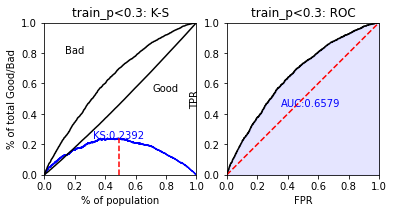

{'KS': 0.2392, 'AUC': 0.6579, 'Gini': 0.3158, 'pic': <Figure size 432x288 with 2 Axes>}


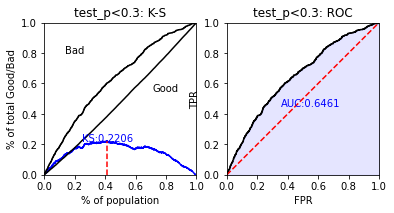

{'KS': 0.2206, 'AUC': 0.6461, 'Gini': 0.2923, 'pic': <Figure size 432x288 with 2 Axes>}


In [466]:
train_results_p03=train_results.loc[train_results.predicted_probs_train<0.3]
test_results_p03=test_results.loc[test_results.predicted_probs_test<0.3]
# performance ks & roc ------
train_perf = sc.perf_eva(train_results_p03.actual_train, train_results_p03.predicted_probs_train, title = "train_p<0.3",show_plot=True)
print(train_perf)
test_perf = sc.perf_eva(test_results_p03.actual_test, test_results_p03.predicted_probs_test, title = "test_p<0.3",show_plot=True)
print(test_perf)

#### Results for probality < 0.1

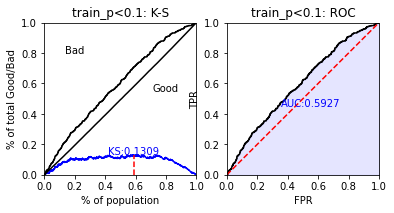

{'KS': 0.1309, 'AUC': 0.5927, 'Gini': 0.1853, 'pic': <Figure size 432x288 with 2 Axes>}


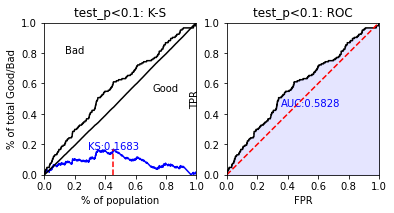

{'KS': 0.1683, 'AUC': 0.5828, 'Gini': 0.1657, 'pic': <Figure size 432x288 with 2 Axes>}


In [467]:
# performance ks & roc probability 0.1 ------
train_results_p01=train_results.loc[train_results.predicted_probs_train<0.1]
test_results_p01=test_results.loc[test_results.predicted_probs_test<0.1]
train_perf = sc.perf_eva(train_results_p01.actual_train, train_results_p01.predicted_probs_train, title = "train_p<0.1")
print(train_perf)
test_perf = sc.perf_eva(test_results_p01.actual_test, test_results_p01.predicted_probs_test, title = "test_p<0.1")
print(test_perf)


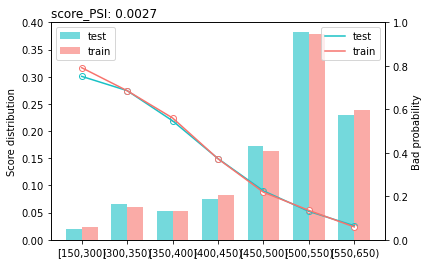

{'psi':   variable       PSI
 0    score  0.002748,
 'pic': {'score': <Figure size 432x288 with 2 Axes>}}

In [533]:
# score ------
card = sc.scorecard(bins_adj, lr, X_train_bin.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train_bin, 'test':y_test_bin}
)

In [536]:
score_train_excel=pd.concat([train_score['score'],train_woe],axis=1).reset_index(drop=True)
pd_train=pd.DataFrame(lr.predict_proba(X_train_bin)[:,1],columns=["PD"])
score_train_excel=pd.concat([pd_train,score_train_excel],axis=1)

score_test_excel=pd.concat([test_score['score'],test_woe],axis=1).reset_index(drop=True)
pd_test=pd.DataFrame(lr.predict_proba(X_test_bin)[:,1],columns=["PD"])
score_test_excel=pd.concat([pd_test,score_test_excel],axis=1)

In [551]:
bins_deneme= sc.woebin(score_train_excel.iloc[:, 0:3], y="default",bin_num_limit=10,count_distr_limit=0.05,stop_limit=0.01)
bins_deneme['score'].bin

[INFO] creating woe binning ...


0     [-inf,330.0)
1    [330.0,380.0)
2    [380.0,450.0)
3    [450.0,480.0)
4    [480.0,510.0)
5    [510.0,530.0)
6    [530.0,550.0)
7    [550.0,580.0)
8      [580.0,inf)
Name: bin, dtype: category
Categories (9, object): ['[-inf,330.0)' < '[330.0,380.0)' < '[380.0,450.0)' < '[450.0,480.0)' ... '[510.0,530.0)' < '[530.0,550.0)' < '[550.0,580.0)' < '[580.0,inf)']

In [545]:
score_train_excel['rating']="NULL"
for i in range(0,len(score_train_excel['score'])):
    if score_train_excel.score[i] < 330:
        score_train_excel['rating'][i]="RC10"
    elif ((score_train_excel.score[i] >= 330) & (score_train_excel.score[i] < 380)):
        score_train_excel['rating'][i]="RC09"
    elif ((score_train_excel.score[i] >= 380) & (score_train_excel.score[i] < 450)):
        score_train_excel['rating'][i]="RC08"
    elif ((score_train_excel.score[i] >= 450) & (score_train_excel.score[i] < 480)):
        score_train_excel['rating'][i]="RC07"
    elif ((score_train_excel.score[i] >= 480) & (score_train_excel.score[i] < 500)):
        score_train_excel['rating'][i]="RC06"
    elif ((score_train_excel.score[i] >= 500) & (score_train_excel.score[i] < 520)):
        score_train_excel['rating'][i]="RC05"
    elif ((score_train_excel.score[i] >= 520) & (score_train_excel.score[i] < 530)):
        score_train_excel['rating'][i]="RC04"
    elif ((score_train_excel.score[i] >= 530) & (score_train_excel.score[i] < 550)):
        score_train_excel['rating'][i]="RC03"
    elif ((score_train_excel.score[i] >= 550) & (score_train_excel.score[i] < 580)):
        score_train_excel['rating'][i]="RC02"
    else:
        score_train_excel['rating'][i]="RC01"

score_test_excel['rating']="NULL"
for i in range(0,len(score_test_excel['score'])):
    if score_test_excel.score[i] < 330:
        score_test_excel['rating'][i]="RC10"
    elif ((score_test_excel.score[i] >= 330) & (score_test_excel.score[i] < 380)):
        score_test_excel['rating'][i]="RC09"
    elif ((score_test_excel.score[i] >= 380) & (score_test_excel.score[i] < 450)):
        score_test_excel['rating'][i]="RC08"
    elif ((score_test_excel.score[i] >= 450) & (score_test_excel.score[i] < 480)):
        score_test_excel['rating'][i]="RC07"
    elif ((score_test_excel.score[i] >= 480) & (score_test_excel.score[i] < 500)):
        score_test_excel['rating'][i]="RC06"
    elif ((score_test_excel.score[i] >= 500) & (score_test_excel.score[i] < 520)):
        score_test_excel['rating'][i]="RC05"
    elif ((score_test_excel.score[i] >= 520) & (score_test_excel.score[i] < 530)):
        score_test_excel['rating'][i]="RC04"
    elif ((score_test_excel.score[i] >= 530) & (score_test_excel.score[i] < 550)):
        score_test_excel['rating'][i]="RC03"
    elif ((score_test_excel.score[i] >= 550) & (score_test_excel.score[i] < 580)):
        score_test_excel['rating'][i]="RC02"
    else:
        score_test_excel['rating'][i]="RC01"
score_test_excel["train_test"]="Test"
score_train_excel["train_test"]="Train"
score_full_excel=pd.concat([score_train_excel,score_test_excel])
#score_full_excel.to_csv("score_full.csv",index=False)

Try different methods with default parameters

In [282]:
modeller=[LGBMClassifier,XGBClassifier,GradientBoostingClassifier,LogisticRegression]
accuracy_tot_train = []
accuracy_tot_test = []

auc_score_train=[]
auc_score_test=[]

ks_score_train=[]
ks_score_test=[]

model_name=[]

def compML(algoritma):

    model_name.append(algoritma.__name__)
    start = time.time()
    model=algoritma().fit(X_train_bin,y_train_bin)
    y_prob = model.predict_proba(X_test_bin)[:, 1]
    
    accuracy_train=accuracy_score(y_train_bin, model.predict(X_train_bin))
    accuracy_test=accuracy_score(y_test_bin, model.predict(X_test_bin))
    
    te = {'predicted_probs_test': model.predict_proba(X_test_bin)[:,1], 'actual_test': y_test_bin,'predicted_test': model.predict(X_test_bin)}
    test_results= pd.DataFrame(data=te).sort_values("predicted_probs_test",ascending=True)
    tr = {'predicted_probs_train': model.predict_proba(X_train_bin)[:,1], 'actual_train': y_train_bin,'predicted_train': model.predict(X_train_bin)}
    train_results= pd.DataFrame(data=tr).sort_values("predicted_probs_train",ascending=True)
    
    # performance ks & roc full data ------
    train_perf = sc.perf_eva(train_results.actual_train, train_results.predicted_probs_train, title = "train full",show_plot=False)
    test_perf = sc.perf_eva(test_results.actual_test, test_results.predicted_probs_test, title = "test full",show_plot=False)


    accuracy_tot_train.append(accuracy_train)
    accuracy_tot_test.append(accuracy_test)
    
    auc_score_train.append(train_perf['AUC'])
    auc_score_test.append(test_perf['AUC'])
    
    ks_score_train.append(train_perf['KS'])
    ks_score_test.append(test_perf['KS'])
    
    print(algoritma.__name__,"Accuracy Test:",accuracy_test)
    print('AUC Test:', test_perf['AUC'])
    print('KS Test:', test_perf['KS'])
for i in modeller:
    compML(i)

LGBMClassifier Accuracy Test: 0.8190105912320687
AUC Test: 0.7776
KS Test: 0.4321
XGBClassifier Accuracy Test: 0.8123072797962193
AUC Test: 0.7596
KS Test: 0.4034
GradientBoostingClassifier Accuracy Test: 0.8200831210618045
AUC Test: 0.7832
KS Test: 0.4422
LogisticRegression Accuracy Test: 0.8227644456361443
AUC Test: 0.7756
KS Test: 0.4294


In [283]:
all_method_results=pd.DataFrame(
    {'Model Name': model_name,
     'Accuracy Train': accuracy_tot_train,
     'Accuracy Test': accuracy_tot_test,
     'AUC Train': auc_score_train,
     'AUC Test': auc_score_test,
     'KS Train':ks_score_train,
     'KS Test':ks_score_test
    })
all_method_results.sort_values("AUC Test",ascending=False)

,Model Name,Accuracy Train,Accuracy Test,AUC Train,AUC Test,KS Train,KS Test
2,GradientBoostingClassifier,0.827925,0.820083,0.8053,0.7832,0.4570,0.4422
0,LGBMClassifier,0.840797,0.819011,0.8834,0.7776,0.6100,0.4321
3,LogisticRegression,0.821936,0.822764,0.7838,0.7756,0.4287,0.4294
1,XGBClassifier,0.904398,0.812307,0.9560,0.7596,0.7711,0.4034


### Champion Methods:
1. GradientBoostingClassifier
2. LGBM
3. Logistic Regression

I will try to improve these methods

### The methods I use for feature elimination/selection:
1. BorutaPy (RandomForest) (https://github.com/scikit-learn-contrib/boruta_py)
2. Recursive Feature Elimination (https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html?highlight=recursive%20feature)
3. IV Elimination

But i didn't improve the metrics so much. Using too much features is not good idea sometimes in terms of business perspective. Because of that i would try to eliminate the weak features but i didn't. This issue should be investigate more deeply.

### Boruta

In [49]:
from boruta import BorutaPy
rf = ExtraTreesClassifier()

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2)

# find all relevant features - 5 features should be selected
feat_selector.fit(np.array(X_train_bin), np.array(y_train_bin))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	101
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	101
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	101
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	101
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	101
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	101
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	101
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	20
Rejected: 	73
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	20
Rejected: 	73
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	20
Rejected: 	73
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	20
Rejected: 	73
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	17
Rejected: 	76
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	17
Rejected: 	76
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	17
Rejected: 	76
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	17
Rejected: 	76
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	14

BorutaPy(estimator=ExtraTreesClassifier(n_estimators=42,
                                        random_state=RandomState(MT19937) at 0x28F7AB50B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x28F7AB50B40, verbose=2)

In [50]:
feat_selector.ranking_

array([ 1,  3,  1, 55, 75, 89, 94, 82, 30, 51, 66, 57, 60, 62, 25, 38, 24,
       36, 34, 19, 32, 43, 22, 40, 35, 28, 27, 22, 31, 33, 36, 40, 51,  2,
        1,  1,  5,  1, 16, 69, 89, 63, 75, 78, 79, 89, 87, 84, 81,  1,  1,
        1,  4, 15, 12, 14,  8, 18, 10, 86, 70, 70, 67, 73, 72, 93, 91, 85,
       83,  7,  9, 54, 10, 21,  6, 13, 57, 20, 56, 64, 74, 77, 67, 92, 26,
       53, 42, 59, 65, 79, 60, 45, 16, 29, 38, 46, 48, 49, 50, 47, 44])

In [55]:
feat_selector.transform(np.array(X_train_bin),np.array(y_train_bin))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Recursive Feature Elimination with LGBM-CV

In [40]:
X = df_bin.loc[:,df_bin.columns != 'default']
#variable_names=X.columns.tolist()
y=df_bin.default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [42]:
from sklearn.feature_selection import RFECV
lr = LGBMClassifier()
min_feature = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=lr, step=1, cv=5,verbose=None, scoring='roc_auc',min_features_to_select=min_feature).fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [32]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [26]:
type(y_train[0])

numpy.int64

In [600]:
rfecv.ranking_ 

array([1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 2, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4])

Accuracy Test:  0.82517763775305
AUC Test:  0.7882558779923137


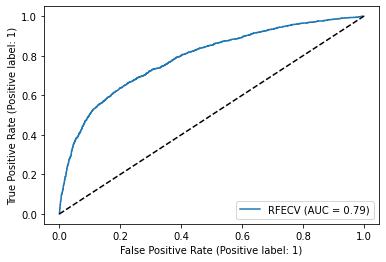

In [601]:
print("Accuracy Test: ",accuracy_score(y_test_bin, rfecv.predict(X_test_bin)))
print("AUC Test: ",roc_auc_score(y_test_bin, rfecv.predict_proba(X_test_bin)[:,1]))
metrics.plot_roc_curve(rfecv, X_test_bin, y_test_bin)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

### GradientBoostingClassifier Model Tuning

In [621]:
parameters = {
    "loss":["exponential"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2,0.009],
    "max_depth":[3,5,8],
    "n_estimators":[100,10,50]
    }

gbc_cv = GridSearchCV(GradientBoostingClassifier(), parameters, cv=None, n_jobs=-1,verbose=5,return_train_score=True,scoring='roc_auc')

gbc_cv.fit(X_train_bin, y_train_bin)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2, 0.009],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 5, 8],
                         'n_estimators': [100, 10, 50]},
             return_train_score=True, scoring='roc_auc', verbose=5)

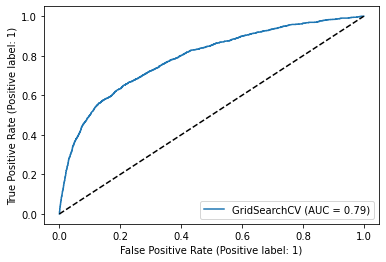

Accuracy Train:  0.8220702601233575
Accuracy Test:  0.8241051079233142
AUC Train:  0.7960176465072184
AUC Test:  0.7890143683304884


In [622]:
metrics.plot_roc_curve(gbc_cv, X_test_bin, y_test_bin)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
print("Accuracy Train: ",accuracy_score(y_train_bin, gbc_cv.predict(X_train_bin)))
print("Accuracy Test: ",accuracy_score(y_test_bin, gbc_cv.predict(X_test_bin)))
print("AUC Train: ",roc_auc_score(y_train_bin, gbc_cv.predict_proba(X_train_bin)[:,1]))
print("AUC Test: ",roc_auc_score(y_test_bin, gbc_cv.predict_proba(X_test_bin)[:,1]))

In [623]:
print(gbc_cv.score(X_train_bin, y_train_bin))
print(gbc_cv.best_params_)

0.7960176465072184
{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'n_estimators': 100}


In [626]:
gbc_cv_results=pd.DataFrame(gbc_cv.cv_results_).sort_values('mean_test_score', axis=0, ascending=False)
gbc_cv_results.to_excel("gbc_gridsearchcv_results.xlsx")

### LGBMClassifier Model Tuning

In [591]:
lgbm_params = {"boosting_type":['gbdt','dart','goss']}

In [592]:
lgbm = LGBMClassifier()
lgbm_cv = GridSearchCV(lgbm, lgbm_params, cv = 5, n_jobs = -1, verbose = True,scoring='roc_auc', return_train_score=True,error_score='raise')
lgbm_cv.fit(X_train_bin, y_train_bin)
print("tuned hpyerparameters :(best parameters) ",lgbm_cv.best_params_)
print("AUC :",lgbm_cv.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
tuned hpyerparameters :(best parameters)  {'boosting_type': 'dart'}
AUC : 0.7767170606899226


In [593]:
print("Accuracy Train: ",accuracy_score(y_train_bin, lgbm_cv.predict(X_train_bin)))
print("Accuracy Test: ",accuracy_score(y_test_bin, lgbm_cv.predict(X_test_bin)))
print("AUC Train: ",roc_auc_score(y_train_bin, lgbm_cv.predict_proba(X_train_bin)[:,1]))
print("AUC Test: ",roc_auc_score(y_test_bin, lgbm_cv.predict_proba(X_test_bin)[:,1]))

Accuracy Train:  0.8265397336193796
Accuracy Test:  0.8263842338115028
AUC Train:  0.8268793561731947
AUC Test:  0.7864730054739353


In [594]:
pd.DataFrame(lgbm_cv.cv_results_).sort_values('mean_test_score', axis=0, ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_boosting_type,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,4.100006,0.566872,0.109225,0.027055,dart,{'boosting_type': 'dart'},0.745708,0.752737,0.789721,0.798695,0.796724,0.776717,0.022755,1,0.839430,0.840378,0.832564,0.829924,0.829139,0.834287,0.004734
0,1.848006,0.258056,0.103448,0.013987,gbdt,{'boosting_type': 'gbdt'},0.740582,0.748894,0.787691,0.795926,0.789299,0.772478,0.022968,2,0.873923,0.873023,0.865233,0.865531,0.868551,0.869252,0.003648
2,2.908093,0.185703,0.108675,0.016136,goss,{'boosting_type': 'goss'},0.733175,0.736637,0.781814,0.782049,0.775164,0.761768,0.022098,3,0.861591,0.859517,0.852240,0.850010,0.852188,0.855109,0.004565


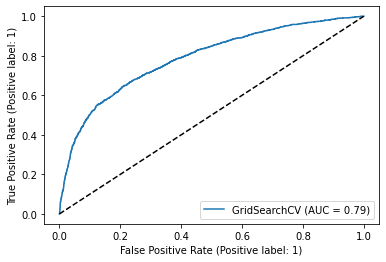

In [627]:
metrics.plot_roc_curve(lgbm_cv, X_test_bin, y_test_bin)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

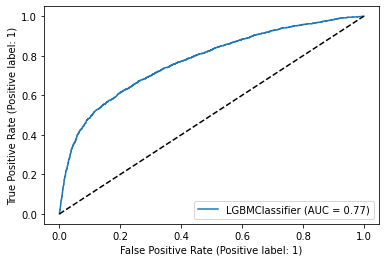

Accuracy Train:  0.8291767229820327
Accuracy Test:  0.8186083925459177
AUC Train:  0.8294163138126813
AUC Test:  0.7749306135366588


In [485]:
lgbm_tuned = LGBMClassifier(boosting_type='dart').fit(X_train_bin, y_train_bin)
metrics.plot_roc_curve(lgbm_tuned, X_test_bin, y_test_bin)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
print("Accuracy Train: ",accuracy_score(y_train_bin, lgbm_tuned.predict(X_train_bin)))
print("Accuracy Test: ",accuracy_score(y_test_bin, lgbm_tuned.predict(X_test_bin)))
print("AUC Train: ",roc_auc_score(y_train_bin, lgbm_tuned.predict_proba(X_train_bin)[:,1]))
print("AUC Test: ",roc_auc_score(y_test_bin, lgbm_tuned.predict_proba(X_test_bin)[:,1]))
#{'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}

In [74]:
Importance = pd.DataFrame({"Importance": lgbm_tuned.feature_importances_},
                         index = X_train_bin.columns)
Importance.sort_values(by = "Importance", axis = 0, ascending = False).head(10)

,Importance
PAY_0_woe,134
LIMIT_BAL_woe,126
AGE_woe,107
PAY_SUM20_woe,105
PAY_AMT6_woe,92
PAY_AMT3_woe,88
SEX_MARRIAGE_woe,86
PAY_AMT2_woe,83
PAY_AMT1_woe,82
LIMIT_BAL_PAY_AMT_6_woe,80


In [75]:
te = {'predicted_probs_test': lgbm_tuned.predict_proba(X_test_bin)[:,1], 'actual_test': y_test_bin,'predicted_test': lgbm_tuned.predict(X_test_bin)}
test_results= pd.DataFrame(data=te).sort_values("predicted_probs_test",ascending=True)
tr = {'predicted_probs_train': lgbm_tuned.predict_proba(X_train_bin)[:,1], 'actual_train': y_train_bin,'predicted_train': lgbm_tuned.predict(X_train_bin)}
train_results= pd.DataFrame(data=tr).sort_values("predicted_probs_train",ascending=True)
train_breaks_adj = {'predicted_probs_train': [0.1,0.2,0.3,0.4,0.5,0.6,0.7]}
train_bins_prob = sc.woebin(train_results, y="actual_train",breaks_list=train_breaks_adj)
test_breaks_adj = {'predicted_probs_test': [0.1,0.2,0.3,0.4,0.5,0.6,0.7]}
test_bins_prob = sc.woebin(test_results, y="actual_test",breaks_list=test_breaks_adj)
ms_train=pd.DataFrame(train_bins_prob['predicted_probs_train']).drop(['breaks','is_special_values'],axis=1)
ms_test=pd.DataFrame(test_bins_prob['predicted_probs_test']).drop(['breaks','is_special_values'],axis=1)
ms_train["good_dist"],ms_train["bad_dist"]=ms_train.good/ms_train.good.sum(),ms_train.bad/ms_train.bad.sum()
ms_test["good_dist"],ms_test["bad_dist"]=ms_test.good/ms_test.good.sum(),ms_test.bad/ms_test.bad.sum()
ms_train["cum_good_dist"],ms_train["cum_bad_dist"]=np.cumsum(ms_train.good_dist),np.cumsum(ms_train.bad_dist)
ms_test["cum_good_dist"],ms_test["cum_bad_dist"]=np.cumsum(ms_test.good_dist),np.cumsum(ms_test.bad_dist)
ms_train["KS"],ms_test["KS"]=round((ms_train["cum_good_dist"]-ms_train["cum_bad_dist"]),4),round((ms_test["cum_good_dist"]-ms_test["cum_bad_dist"]),4)
print("KS Train:",max(ms_train["KS"]))
print("KS Test:",max(ms_test["KS"]))

[INFO] creating woe binning ...
[INFO] creating woe binning ...
KS Train: 0.4721
KS Test: 0.4285


In [76]:
ms_train

,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,good_dist,bad_dist,cum_good_dist,cum_bad_dist,KS
0,predicted_probs_train,"[-inf,0.1)",3472,0.155180,3360,112,0.032258,-2.173856,0.374120,1.548725,0.194186,0.022086,0.194186,0.022086,0.1721
1,predicted_probs_train,"[0.1,0.2)",9488,0.424064,8514,974,0.102656,-0.940714,0.282196,1.548725,0.492053,0.192073,0.686239,0.214159,0.4721
2,predicted_probs_train,"[0.2,0.3)",3968,0.177349,3044,924,0.232863,0.035126,0.000221,1.548725,0.175923,0.182213,0.862163,0.396372,0.4658
3,predicted_probs_train,"[0.3,0.4)",1581,0.070662,1027,554,0.350411,0.610109,0.030441,1.548725,0.059354,0.109249,0.921517,0.505620,0.4159
4,predicted_probs_train,"[0.4,0.5)",1097,0.049030,542,555,0.505925,1.251044,0.097734,1.548725,0.031324,0.109446,0.952841,0.615066,0.3378
5,predicted_probs_train,"[0.5,0.6)",554,0.024761,226,328,0.592058,1.599820,0.082583,1.548725,0.013061,0.064682,0.965902,0.679748,0.2862
6,predicted_probs_train,"[0.6,0.7)",1246,0.055690,430,816,0.654896,1.867971,0.254163,1.548725,0.024851,0.160915,0.990753,0.840663,0.1501
7,predicted_probs_train,"[0.7,inf)",968,0.043265,160,808,0.834711,2.846730,0.427267,1.548725,0.009247,0.159337,1.000000,1.000000,0.0000


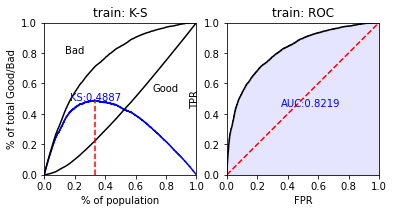

{'KS': 0.4887, 'AUC': 0.8219, 'Gini': 0.6438, 'pic': <Figure size 432x288 with 2 Axes>}


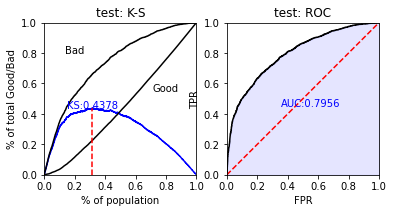

{'KS': 0.4378, 'AUC': 0.7956, 'Gini': 0.5913, 'pic': <Figure size 432x288 with 2 Axes>}


In [77]:
# predicted proability
train_pred = lgbm_tuned.predict_proba(X_train_bin)[:,1]
test_pred = lgbm_tuned.predict_proba(X_test_bin)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_bin, train_pred, title = "train")
print(train_perf)
test_perf = sc.perf_eva(y_test_bin, test_pred, title = "test")
print(test_perf)

### Logistic Regression Model Tuning

In [285]:
# Grid search cross validation
grid={"C":[0.9,1,1.1,0.8,0.95],"penalty":['l1', 'l2', 'elasticnet', 'none'],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5,verbose=True,n_jobs=-1,return_train_score=True,scoring='roc_auc').fit(X_train_bin,y_train_bin)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("AUC :",logreg_cv.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
tuned hpyerparameters :(best parameters)  {'C': 0.8, 'penalty': 'l1', 'solver': 'liblinear'}
AUC : 0.7776437346941071


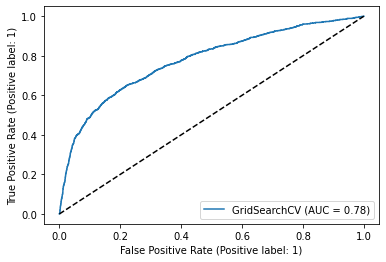

Accuracy Train:  0.8220255653883972
Accuracy Test:  0.8227644456361443
AUC Train:  0.7837579444809729
AUC Test:  0.7761820163612552


In [286]:
metrics.plot_roc_curve(logreg_cv, X_test_bin, y_test_bin)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
print("Accuracy Train: ",accuracy_score(y_train_bin, logreg_cv.predict(X_train_bin)))
print("Accuracy Test: ",accuracy_score(y_test_bin, logreg_cv.predict(X_test_bin)))
print("AUC Train: ",roc_auc_score(y_train_bin, logreg_cv.predict_proba(X_train_bin)[:,1]))
print("AUC Test: ",roc_auc_score(y_test_bin, logreg_cv.predict_proba(X_test_bin)[:,1]))

In [632]:
log_gridsearchcv=pd.DataFrame(logreg_cv.cv_results_).sort_values('mean_test_score', axis=0, ascending=False)
log_gridsearchcv.to_excel("lr_gridsearchcv.xlsx")